In [61]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [62]:
ls data

data_120_120_norm.npz               data_pca_200_y_mean.pickle.npz
data_14400_norm.npz                 data_pca_250_y_mean.pickle.npz
data_all_10000_norm.npz             data_pca_50_y_mean.pickle.npz
data_all_100_100_norm.npz           df_all_images_100_100.pickle
data_all_120_120_norm.npz           df_all_images_120_120.pickle
data_all_14400_norm.npz             df_clean_all_images_100_100.pickle
data_clean_all_14400_norm.npz       df_clean_all_images_120_120.pickle
data_pca_120_y_mean.pickle.npz      df_images_120_120.pickle


In [63]:
data = np.load('./data/data_pca_250_y_mean.pickle.npz')

In [64]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [66]:
x_train.shape , x_test.shape

((2068, 250), (518, 250))

In [67]:
#Training the model - SVM
from sklearn.svm import SVC

In [68]:
model = SVC(C=1.0, kernel='rbf', gamma=0.01, probability=True)

In [69]:
model.fit(x_train, y_train)

SVC(gamma=0.01, probability=True)

In [70]:
#score
model.score(x_train, y_train)

0.9995164410058027

In [71]:
model.score(x_test, y_test)

0.5675675675675675

Model Evaluation
- Confusion Matrix
- Classification Report
- Kappa Score 
- ROC and AUC (probability)

In [72]:
from sklearn import metrics

In [73]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) #probability

Text(0, 0.5, 'True Values')

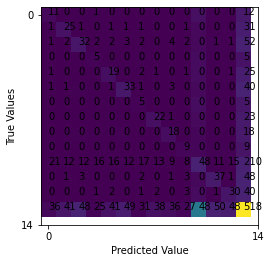

In [77]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)), axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)), axis=1)


plt.imshow(cm)
for i in range(14):
    for j in range(14):
        plt.text(i,j,cm[i,j])
plt.xticks([0,14])
plt.yticks([0,14])
plt.xlabel('Predicted Value')
plt.ylabel('True Values')

In [78]:
cr = metrics.classification_report(y_test, y_pred, target_names=['Biedron','Bosak','Duda','Grodzka','Holownia','Kaczynski','Kalisz','Komorowski','Korwin-Mikke','Miller','Szydlo','Trzaskowski','Tusk'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
Biedron,0.916667,0.305556,0.458333,36.000000
Bosak,0.806452,0.609756,0.694444,41.000000
Duda,0.615385,0.666667,0.640000,48.000000
Grodzka,1.000000,0.200000,0.333333,25.000000
Holownia,0.760000,0.463415,0.575758,41.000000
Kaczynski,0.825000,0.673469,0.741573,49.000000
Kalisz,1.000000,0.161290,0.277778,31.000000
Komorowski,0.956522,0.578947,0.721311,38.000000
Korwin-Mikke,1.000000,0.500000,0.666667,36.000000
Miller,1.000000,0.333333,0.500000,27.000000


In [79]:
#Kappa score - random accuracy
metrics.cohen_kappa_score(y_test, y_pred)
#Should be more than 60%!

0.5258096814401602

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
model_tune = SVC()

In [82]:
param_grid = {'C':[1,10,20,30,50,100],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002],
             'coef0':[0,1]}

In [83]:
#Hyper Parameter Tuning
model_grid = GridSearchCV(model_tune, param_grid=param_grid,scoring='accuracy',cv=5,verbose=1)

In [84]:
model_grid.fit(X,y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [86]:
model_grid.best_params_

{'C': 20, 'coef0': 0, 'gamma': 0.002, 'kernel': 'rbf'}

In [87]:
model_grid.best_score_

0.77764351806905

In [88]:
model_best = SVC(C=20,kernel='rbf',gamma=0.002,coef0=0, probability=True)

In [89]:
model_best.fit(x_train, y_train)
model_best.score(x_test,y_test)

0.8204633204633205

In [90]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test) #probability

Text(0, 0.5, 'True Values')

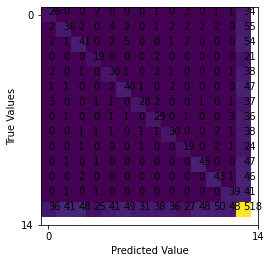

In [92]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)), axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)), axis=1)


plt.imshow(cm)
for i in range(14):
    for j in range(14):
        plt.text(i,j,cm[i,j])
plt.xticks([0,14])
plt.yticks([0,14])
plt.xlabel('Predicted Value')
plt.ylabel('True Values')

In [93]:
cr = metrics.classification_report(y_test, y_pred, target_names=['Biedron','Bosak','Duda','Grodzka','Holownia','Kaczynski','Kalisz','Komorowski','Korwin-Mikke','Miller','Szydlo','Trzaskowski','Tusk'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
Biedron,0.764706,0.722222,0.742857,36.000000
Bosak,0.654545,0.878049,0.750000,41.000000
Duda,0.759259,0.854167,0.803922,48.000000
Grodzka,0.904762,0.760000,0.826087,25.000000
Holownia,0.789474,0.731707,0.759494,41.000000
Kaczynski,0.851064,0.816327,0.833333,49.000000
Kalisz,0.756757,0.903226,0.823529,31.000000
Komorowski,0.805556,0.763158,0.783784,38.000000
Korwin-Mikke,0.789474,0.833333,0.810811,36.000000
Miller,0.791667,0.703704,0.745098,27.000000


In [94]:
#saving model
import pickle
pickle.dump(model_best,open('./model/clean_model_svm.pickle','wb'))

In [95]:
pickle.dump(mean,open('./model/clean_mean_preprocess.pickle','wb'))